# Introduction
The present project consists in the prediction of the movement made by an individual based on the data obtained from a 3-axis accelerometer. To carry out this prediction a set of labeled data was provided. The strategy followed to achieve the prediction of the movements was based on the that published by de BAI et al *(Bai, J .; Goldsmith, J .; Caffo, B .; Glass, TA; Crainiceanu, CM Movelets: A dictionary of movement Electron J. Stat. 2012, 6, 559)*. This author and others who validated his work use 'movelets'. This technique decomposes movements into short components called “movelets”, and builds a reference for each activity type. Unknown activities are predicted by matching new movelets to the reference. To predict activities based on accelerometer data, we first define a movelet as a basic element of 3-axis time series data. Collections of movelets paired with known labels (annotations) form chapters, which are in turn organized into reference dictionaries of known movelets and their associated activities. Classification of accelerometer data with unknown activity annotations is based on decomposing the unlabeled data into component movelets, and then matching each unlabeled movelet to these chapters. The label of the best matched chapter is used as a preliminary prediction of the activity of the unlabeled movelet. Then, assuming that a movement is continuous and cannot last less than 3 seconds, a smoothing of the sequence of assigned tags was performed comparing with the two previous tags and the following 2 in the time sequence to confirm the tag assigned to the unknown sample.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

# Methods

# Train dataset
Reading training datasets and merging both datasets based on timestamp

In [2]:
df_trts = pd.read_csv('train_time_series.csv')
df_trts.head()

,Unnamed: 0,timestamp,UTC time,accuracy,x,y,z
0,20586,1565109930787,2019-08-06T16:45:30.787,unknown,-0.006485,-0.934860,-0.069046
1,20587,1565109930887,2019-08-06T16:45:30.887,unknown,-0.066467,-1.015442,0.089554
2,20588,1565109930987,2019-08-06T16:45:30.987,unknown,-0.043488,-1.021255,0.178467
3,20589,1565109931087,2019-08-06T16:45:31.087,unknown,-0.053802,-0.987701,0.068985
4,20590,1565109931188,2019-08-06T16:45:31.188,unknown,-0.054031,-1.003616,0.126450


In [3]:
df_trl = pd.read_csv('train_labels.csv')
df_trl.head()

,Unnamed: 0,timestamp,UTC time,label
0,20589,1565109931087,2019-08-06T16:45:31.087,1
1,20599,1565109932090,2019-08-06T16:45:32.090,1
2,20609,1565109933092,2019-08-06T16:45:33.092,1
3,20619,1565109934094,2019-08-06T16:45:34.094,1
4,20629,1565109935097,2019-08-06T16:45:35.097,1


In [4]:
df = pd.merge(df_trts,df_trl, on=['timestamp'], how = 'left')
df.head(20)

,Unnamed: 0_x,timestamp,UTC time_x,accuracy,x,y,z,Unnamed: 0_y,UTC time_y,label
0,20586,1565109930787,2019-08-06T16:45:30.787,unknown,-0.006485,-0.934860,-0.069046,NaN,NaN,NaN
1,20587,1565109930887,2019-08-06T16:45:30.887,unknown,-0.066467,-1.015442,0.089554,NaN,NaN,NaN
2,20588,1565109930987,2019-08-06T16:45:30.987,unknown,-0.043488,-1.021255,0.178467,NaN,NaN,NaN
3,20589,1565109931087,2019-08-06T16:45:31.087,unknown,-0.053802,-0.987701,0.068985,20589.0,2019-08-06T16:45:31.087,1.0
4,20590,1565109931188,2019-08-06T16:45:31.188,unknown,-0.054031,-1.003616,0.126450,NaN,NaN,NaN
5,20591,1565109931288,2019-08-06T16:45:31.288,unknown,-0.010880,-0.967575,0.170898,NaN,NaN,NaN
6,20592,1565109931388,2019-08-06T16:45:31.388,unknown,0.052841,-0.982330,0.235565,NaN,NaN,NaN
7,20593,1565109931488,2019-08-06T16:45:31.488,unknown,0.032974,-1.053207,0.256714,NaN,NaN,NaN
8,20594,1565109931589,2019-08-06T16:45:31.589,unknown,-0.090424,-0.972794,0.356308,NaN,NaN,NaN
9,20595,1565109931689,2019-08-06T16:45:31.689,unknown,0.124268,-0.890533,0.223221,NaN,NaN,NaN


# Exploring dataset
Graph of both unlabeled train data and labeled train data


Text(0.5, 1.0, 'Unlabeled Train data')

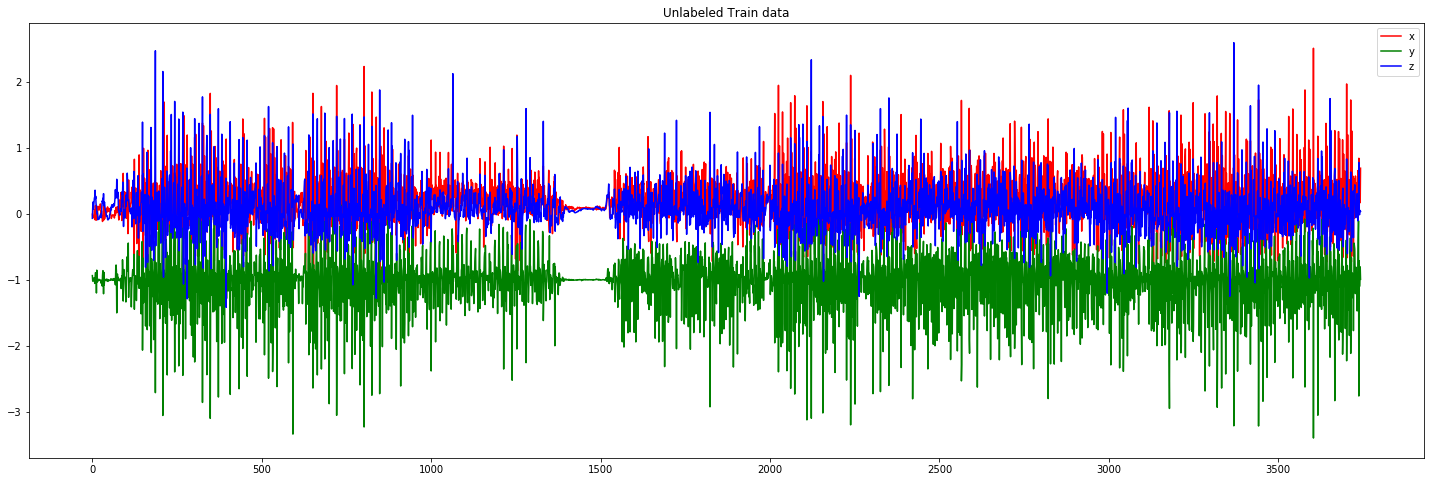

In [5]:
x = df['x']
y = df['y']
z = df['z']
plt.figure(figsize=(25,8))
plt.plot(range(df.shape[0]),x, color ='red',label = 'x')
plt.plot(range(df.shape[0]),y, color ='green',label = 'y')
plt.plot(range(df.shape[0]),z, color ='blue',label = 'z')
plt.legend()
plt.title('Unlabeled Train data')

Text(0.5, 1.0, 'Labeled Train data')

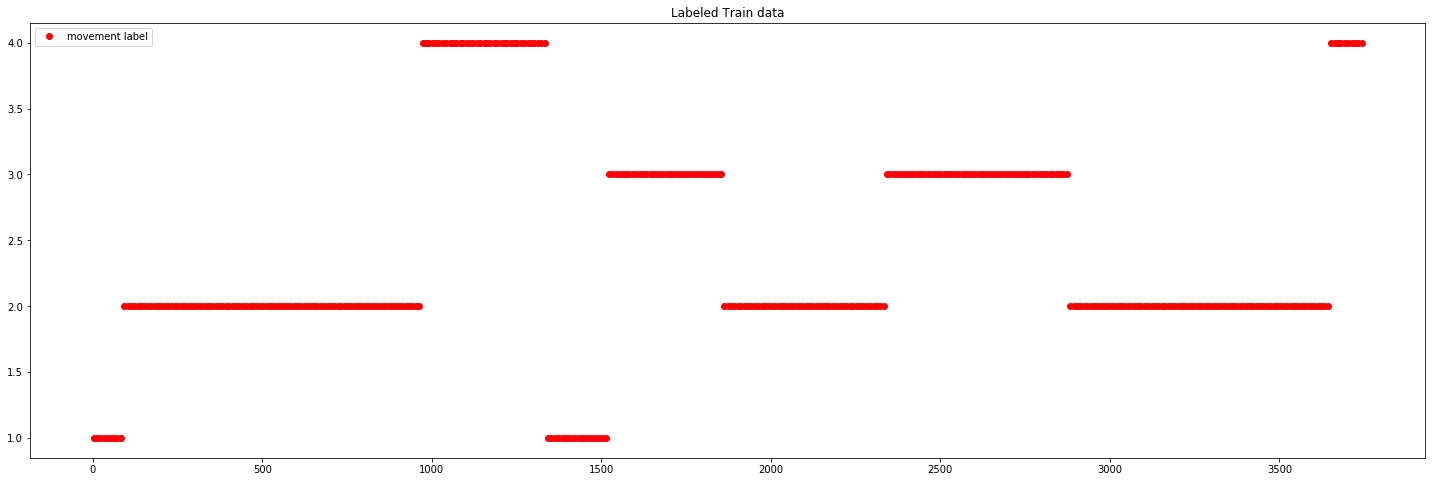

In [6]:
x = df['label']
plt.figure(figsize=(25,8))
plt.plot(range(x.shape[0]),x,'o',color ='red',label = 'movement label')
plt.legend()
plt.title('Labeled Train data')

Since labels are provided on a 1Hz frequency and accelerometer data is provided in a 10hz frequency
I decided to fill de label column in the dataset with the corresponding label por the corresponding second.
Then I keep just the columns of interest

In [7]:
df['label']= df['label'].where(df['label'].notnull(), 
                                other=df['label'].fillna(method='ffill'))
df = df[['timestamp','UTC time_x','x','y','z','label']]

In [8]:
df.head()

,timestamp,UTC time_x,x,y,z,label
0,1565109930787,2019-08-06T16:45:30.787,-0.006485,-0.934860,-0.069046,NaN
1,1565109930887,2019-08-06T16:45:30.887,-0.066467,-1.015442,0.089554,NaN
2,1565109930987,2019-08-06T16:45:30.987,-0.043488,-1.021255,0.178467,NaN
3,1565109931087,2019-08-06T16:45:31.087,-0.053802,-0.987701,0.068985,1.0
4,1565109931188,2019-08-06T16:45:31.188,-0.054031,-1.003616,0.126450,1.0


Text(0.5, 1.0, 'Labeled Train Data Full Dataset')

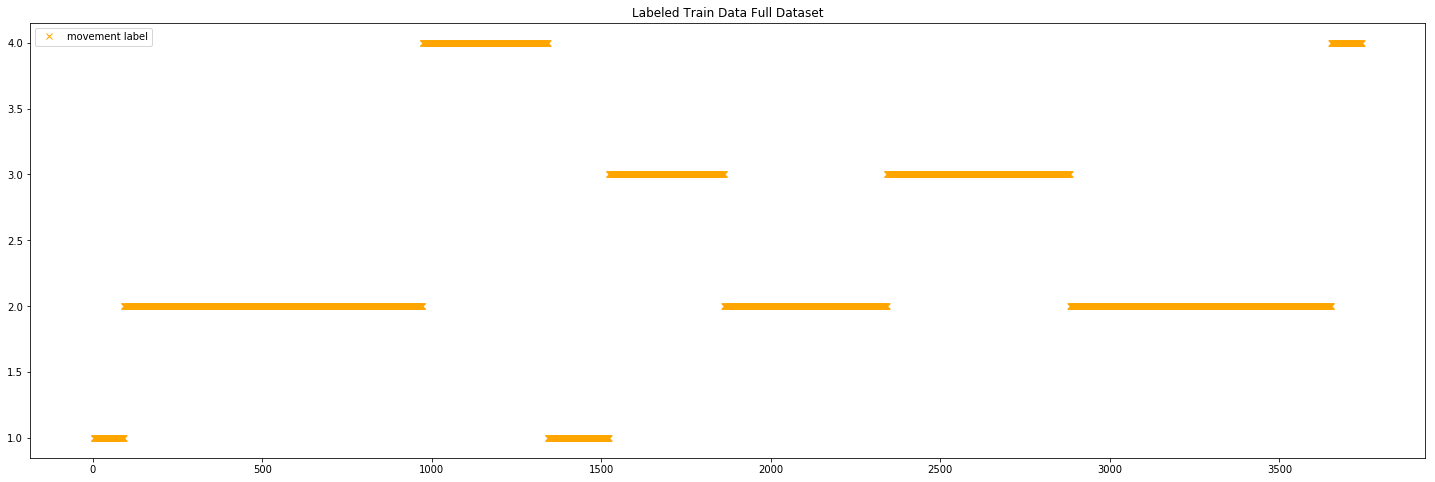

In [9]:
x = df['label']
plt.figure(figsize=(25,8))
plt.plot(range(x.shape[0]),x,'x',color ='orange',label = 'movement label')
plt.legend()
plt.title('Labeled Train Data Full Dataset')

# Movelet dictionary
I define a function to generate the movelet dictionary

In [10]:
def movelet_dict_generator (dataframes,columns):
    '''this function takes a list of dataframes each one chosen for being representative of
    a given movement (label) and the columns of interest(ie. x, y, z,label) 
    to be used to generate de movelet dictionary'''
    movelet_dict = pd.DataFrame(columns = columns)
    for d in dataframes:
        movelet_dictionary =pd.DataFrame(columns = columns)
        for c in columns:
            i = 0
            j = 10
            movelet_column = []
            for n in range(d.shape[0]-10):
                movelet_column.append(d[c][i:j])
                i+=1
                j+=1
            movelet_dictionary[c] = movelet_column   
        movelet_dict = movelet_dict.append(movelet_dictionary,ignore_index=True)
    movelet_dict['label'].loc[0:80] = 1
    movelet_dict['label'].loc[80:160]= 2
    movelet_dict['label'].loc[160:240]= 3
    movelet_dict['label'].loc[240:320]= 4
    return movelet_dict


I define the dataframes which represent each movement label and run the function to generate de movelet dictionary

In [11]:
dflabel1 = df[0:90]
dflabel2 = df[260:350]
dflabel3 = df[1740:1830]
dflabel4 = df[1200:1290]
dataframes = [dflabel1,dflabel2,dflabel3,dflabel4]

movelet_dict_xyz = movelet_dict_generator(dataframes,['x','y','z','label'])

In [12]:
movelet_dict_xyz.head()

,x,y,z,label
0,0 -0.006485 1 -0.066467 2 -0.043488 3 ...,0 -0.934860 1 -1.015442 2 -1.021255 3 ...,0 -0.069046 1 0.089554 2 0.178467 3 ...,1
1,1 -0.066467 2 -0.043488 3 -0.053802 4...,1 -1.015442 2 -1.021255 3 -0.987701 4...,1 0.089554 2 0.178467 3 0.068985 4...,1
2,2 -0.043488 3 -0.053802 4 -0.054031 5...,2 -1.021255 3 -0.987701 4 -1.003616 5...,2 0.178467 3 0.068985 4 0.126450 5...,1
3,3 -0.053802 4 -0.054031 5 -0.010880 6...,3 -0.987701 4 -1.003616 5 -0.967575 6...,3 0.068985 4 0.126450 5 0.170898 6...,1
4,4 -0.054031 5 -0.010880 6 0.052841 7...,4 -1.003616 5 -0.967575 6 -0.982330 7...,4 0.126450 5 0.170898 6 0.235565 7...,1


# Prediction function
I define a function to predict the labels of test data. It calculates the square difference between the unlabeled movement accelerometer data (10 measurements for each axis) and all the movelets on the movelet dictionary to find the movelet which resembles the most.

In [13]:
def mov_prediction(test_dataframe,movelet_dict,samples_per_label,axes):
    '''this function takes a test dataframe a movelet dict, a number of samples per label (frequency of accelerometer
    data collection) and a list of axes to be considered for the comparison with the movelet dict. It returns a list 
    of predicted labels'''
    labels = []    
    i = 0
    j = samples_per_label - 1
    for each in range(test_dataframe.shape[0]//samples_per_label):
        df_diff = pd.DataFrame(columns = axes)
        for a in axes:
            test_movelet = test_dataframe[a].loc[i:j].reset_index(drop = True)
            difference = []
            for n in range(movelet_dict.shape[0]):
                movelet_from_dict = movelet_dict[a][n].reset_index(drop=True)
                diff = sum(np.subtract(movelet_from_dict,test_movelet)**2)
                difference.append(diff)
            df_diff[a] = difference
        df_diff['total_diff'] = df_diff.sum(axis =1)
        min_loc = df_diff['total_diff'].idxmin()
        lb = movelet_dict['label'][min_loc]
        labels.append(lb)
        i+=10
        j+=10
    return labels

# Smoothing function
I define a Function to smooth the label list taking into account that movement last at least 3 seconds so abrupt movement changes are due to prediction inaccuracy and not to real movement changes

In [14]:
def smooth_labels (series,neighbors):
    '''this function takes a dataframe series corresponding to the predicted labels
    and a number of neighbor labels to smooth the predicted labels based on the fact that movements
    last at least a couple of seconds. It returns a smoothed list of labels'''
    smooth_labels = []
    neighbors = neighbors
    smooth_labels[0:0] = series.loc[0:neighbors]
    series = series.values    
    for i in range (neighbors,len(series)-neighbors):
        if any(x!=series[i] for x in smooth_labels[i-neighbors:i]) and any (y!=series[i] for y in series[i+1:i+1+neighbors]):
            smooth_labels.append(smooth_labels[i-neighbors])
            #smooth_labels.append(series[i+1])
            #smooth_labels.append(series[i+1])
        else:
            smooth_labels.append(series[i])
    for j in range (len(series)-neighbors,len(series)-1):
        smooth_labels.append(series[j])
    return smooth_labels

# Testing prediction on labeled data
I will generate a test dataframe sampling some data from the train dataset, even if this is not the best option, due to the nature of the prediction algorithm it is a good option for testing

I define an accuracy function which gives the general accuracy and the accuracy for each label

In [15]:
def accu(train_label,predicted_label):
    accu = (np.sum(train_label==predicted_label))/predicted_label.shape[0]
    return accu

def differential_accuracy (dataframe,true_value_column,predicted_value_column,label_list):
    print('overall accuracy:',accu(dataframe[true_value_column],dataframe[predicted_value_column]))
    accuracies = []
    for l in label_list:
        dataframe_label = dataframe[dataframe[true_value_column] == l]
        acc = accu(dataframe_label[true_value_column],dataframe_label[predicted_value_column])
        accuracies.append([l,acc])
        print('label',l,':',acc)

In [100]:
self_test_df_timestamp_list = [1565109945119, 1565109945220, 1565109945320, 1565109945420, 1565109945520, 1565109945621, 1565109945721, 1565109945821, 1565109945921, 1565109946022, 1565109946122, 1565109946222, 1565109946322, 1565109946422, 1565109946523, 1565109946623, 1565109946723, 1565109946823, 1565109946924, 1565109947024, 1565109947124, 1565109947224, 1565109947325, 1565109947425, 1565109947525, 1565109947625, 1565109947725, 1565109947826, 1565109947926, 1565109948026, 1565109954140, 1565109954240, 1565109954341, 1565109954441, 1565109954541, 1565109954641, 1565109954742, 1565109954842, 1565109954942, 1565109955042, 1565109955142, 1565109955243, 1565109955343, 1565109955443, 1565109955543, 1565109955644, 1565109955744, 1565109955844, 1565109955944, 1565109956044, 1565109956145, 1565109956245, 1565109956345, 1565109956445, 1565109956546, 1565109956646, 1565109956746, 1565109956846, 1565109956947, 1565109957047, 1565109969175, 1565109969275, 1565109969375, 1565109969475, 1565109969575, 1565109969676, 1565109969776, 1565109969876, 1565109969976, 1565109970077, 1565109970177, 1565109970277, 1565109970377, 1565109970477, 1565109970578, 1565109970678, 1565109970778, 1565109970878, 1565109970979, 1565109971079, 1565109990223, 1565109990323, 1565109990423, 1565109990523, 1565109990624, 1565109990724, 1565109990824, 1565109990924, 1565109991024, 1565109991125, 1565109991225, 1565109991325, 1565109991425, 1565109991526, 1565109991626, 1565109991726, 1565109991826, 1565109991927, 1565109992027, 1565109992127, 1565110008264, 1565110008364, 1565110008464, 1565110008564, 1565110008665, 1565110008765, 1565110008865, 1565110008965, 1565110009066, 1565110009166, 1565110009266, 1565110009366, 1565110009467, 1565110009567, 1565110009667, 1565110009767, 1565110009867, 1565110009968, 1565110010068, 1565110010168, 1565110010268, 1565110010369, 1565110010469, 1565110010569, 1565110010669, 1565110010770, 1565110010870, 1565110010970, 1565110011070, 1565110011170, 1565110011271, 1565110011371, 1565110011471, 1565110011571, 1565110011672, 1565110011772, 1565110011872, 1565110011972, 1565110012072, 1565110012173, 1565110059474, 1565110059574, 1565110059674, 1565110059774, 1565110059875, 1565110059975, 1565110060075, 1565110060175, 1565110060275, 1565110060376, 1565110060476, 1565110060576, 1565110060676, 1565110060777, 1565110060877, 1565110060977, 1565110061077, 1565110061178, 1565110061278, 1565110061378, 1565110061478, 1565110061578, 1565110061679, 1565110061779, 1565110061879, 1565110061979, 1565110062080, 1565110062180, 1565110062280, 1565110062380, 1565110062481, 1565110062581, 1565110062681, 1565110062781, 1565110062881, 1565110062982, 1565110063082, 1565110063182, 1565110063282, 1565110063383, 1565110063483, 1565110063583, 1565110063683, 1565110063784, 1565110063884, 1565110063984, 1565110064084, 1565110064184, 1565110064285, 1565110064385, 1565110064485, 1565110064585, 1565110064686, 1565110064786, 1565110064886, 1565110064986, 1565110065086, 1565110065187, 1565110065287, 1565110065387, 1565110068494, 1565110068595, 1565110068695, 1565110068795, 1565110068895, 1565110068995, 1565110069096, 1565110069196, 1565110069296, 1565110069396, 1565110069497, 1565110069597, 1565110069697, 1565110069797, 1565110069897, 1565110069998, 1565110070098, 1565110070198, 1565110070298, 1565110070399, 1565110070499, 1565110070599, 1565110070699, 1565110070800, 1565110070900, 1565110071000, 1565110071100, 1565110071200, 1565110071301, 1565110071401, 1565110082526, 1565110082627, 1565110082727, 1565110082827, 1565110082927, 1565110083028, 1565110083128, 1565110083228, 1565110083328, 1565110083428, 1565110083529, 1565110083629, 1565110083729, 1565110083829, 1565110083930, 1565110084030, 1565110084130, 1565110084230, 1565110084331, 1565110084431, 1565110088540, 1565110088640, 1565110088741, 1565110088841, 1565110088941, 1565110089041, 1565110089142, 1565110089242, 1565110089342, 1565110089442, 1565110089542, 1565110089643, 1565110089743, 1565110089843, 1565110089943, 1565110090044, 1565110090144, 1565110090244, 1565110090344, 1565110090445, 1565110090545, 1565110090645, 1565110090745, 1565110090845, 1565110090946, 1565110091046, 1565110091146, 1565110091246, 1565110091347, 1565110091447, 1565110091547, 1565110091647, 1565110091748, 1565110091848, 1565110091948, 1565110092048, 1565110092148, 1565110092249, 1565110092349, 1565110092449, 1565110092549, 1565110092650, 1565110092750, 1565110092850, 1565110092950, 1565110093051, 1565110093151, 1565110093251, 1565110093351, 1565110093451, 1565110093552, 1565110093652, 1565110093752, 1565110093852, 1565110093953, 1565110094053, 1565110094153, 1565110094253, 1565110094353, 1565110094454, 1565110094554, 1565110094654, 1565110094754, 1565110094855, 1565110094955, 1565110095055, 1565110095155, 1565110095256, 1565110095356, 1565110095456, 1565110095556, 1565110095656, 1565110095757, 1565110095857, 1565110095957, 1565110096057, 1565110096158, 1565110096258, 1565110096358, 1565110096458, 1565110096559, 1565110096659, 1565110096759, 1565110096859, 1565110096959, 1565110097060, 1565110097160, 1565110097260, 1565110097360, 1565110097461, 1565110097561, 1565110097661, 1565110097761, 1565110097862, 1565110097962, 1565110098062, 1565110098162, 1565110098262, 1565110098363, 1565110098463, 1565110098563, 1565110098663, 1565110098764, 1565110098864, 1565110098964, 1565110099064, 1565110099165, 1565110099265, 1565110099365, 1565110099465, 1565110099565, 1565110099666, 1565110099766, 1565110099866, 1565110099966, 1565110100067, 1565110100167, 1565110100267, 1565110100367, 1565110100467, 1565110100568, 1565110100668, 1565110100768, 1565110100868, 1565110100969, 1565110101069, 1565110101169, 1565110101269, 1565110101370, 1565110101470, 1565110101570, 1565110101670, 1565110101770, 1565110101871, 1565110101971, 1565110102071, 1565110102171, 1565110102272, 1565110102372, 1565110102472, 1565110102572, 1565110102673, 1565110102773, 1565110102873, 1565110102973, 1565110103073, 1565110103174, 1565110103274, 1565110103374, 1565110103474, 1565110214830, 1565110214930, 1565110215030, 1565110215131, 1565110215231, 1565110215331, 1565110215431, 1565110215531, 1565110215632, 1565110215732, 1565110215832, 1565110215932, 1565110216033, 1565110216133, 1565110216233, 1565110216333, 1565110216434, 1565110216534, 1565110216634, 1565110216734, 1565110216834, 1565110216935, 1565110217035, 1565110217135, 1565110217235, 1565110217336, 1565110217436, 1565110217536, 1565110217636, 1565110217737, 1565110217837, 1565110217937, 1565110218037, 1565110218137, 1565110218238, 1565110218338, 1565110218438, 1565110218538, 1565110218639, 1565110218739, 1565110218839, 1565110218939, 1565110219040, 1565110219140, 1565110219240, 1565110219340, 1565110219440, 1565110219541, 1565110219641, 1565110219741, 1565110214830, 1565110214930, 1565110215030, 1565110215131, 1565110215231, 1565110215331, 1565110215431, 1565110215531, 1565110215632, 1565110215732, 1565110215832, 1565110215932, 1565110216033, 1565110216133, 1565110216233, 1565110216333, 1565110216434, 1565110216534, 1565110216634, 1565110216734, 1565110216834, 1565110216935, 1565110217035, 1565110217135, 1565110217235, 1565110217336, 1565110217436, 1565110217536, 1565110217636, 1565110217737, 1565110217837, 1565110217937, 1565110218037, 1565110218137, 1565110218238, 1565110218338, 1565110218438, 1565110218538, 1565110218639, 1565110218739, 1565110218839, 1565110218939, 1565110219040, 1565110219140, 1565110219240, 1565110219340, 1565110219440, 1565110219541, 1565110219641, 1565110219741]

In [101]:
self_test_df = pd.DataFrame(self_test_df_timestamp_list, columns = ['timestamp'])

In [102]:
self_test_df = pd.merge(self_test_df,df, on=['timestamp'], how = 'left')

In [103]:
self_test_df.head()

,timestamp,UTC time_x,x,y,z,label
0,1565109945119,2019-08-06T16:45:45.119,0.290436,-1.083405,0.141129,2.0
1,1565109945220,2019-08-06T16:45:45.220,-0.265244,-1.513199,0.189316,2.0
2,1565109945320,2019-08-06T16:45:45.320,0.111771,-0.982285,0.323990,2.0
3,1565109945420,2019-08-06T16:45:45.420,0.138489,-0.554642,0.186050,2.0
4,1565109945520,2019-08-06T16:45:45.520,-0.024078,-0.420502,0.173630,2.0


In [104]:
labels_st = mov_prediction(self_test_df,movelet_dict_xyz,10,['x','y','z'])

In [105]:
len(labels_st)

50

In [106]:
self_test_df_labeled = pd.DataFrame()

In [107]:
i = 9
for j in range(50):
    row = pd.Series(self_test_df.loc[i])
    self_test_df_labeled = self_test_df_labeled.append(row )
    i+=10

In [108]:
self_test_df_labeled=self_test_df_labeled.reset_index()

In [109]:
self_test_df_labeled['labels_st'] = labels_st

I determine the accuracy in the prediction before smoothing

In [110]:
differential_accuracy(self_test_df_labeled,'label','labels_st',[1,2,3,4])

overall accuracy: 0.84
label 1 : 1.0
label 2 : 0.7142857142857143
label 3 : 0.8846153846153846
label 4 : 0.8333333333333334


Text(0.5, 1.0, 'Predicted labels')

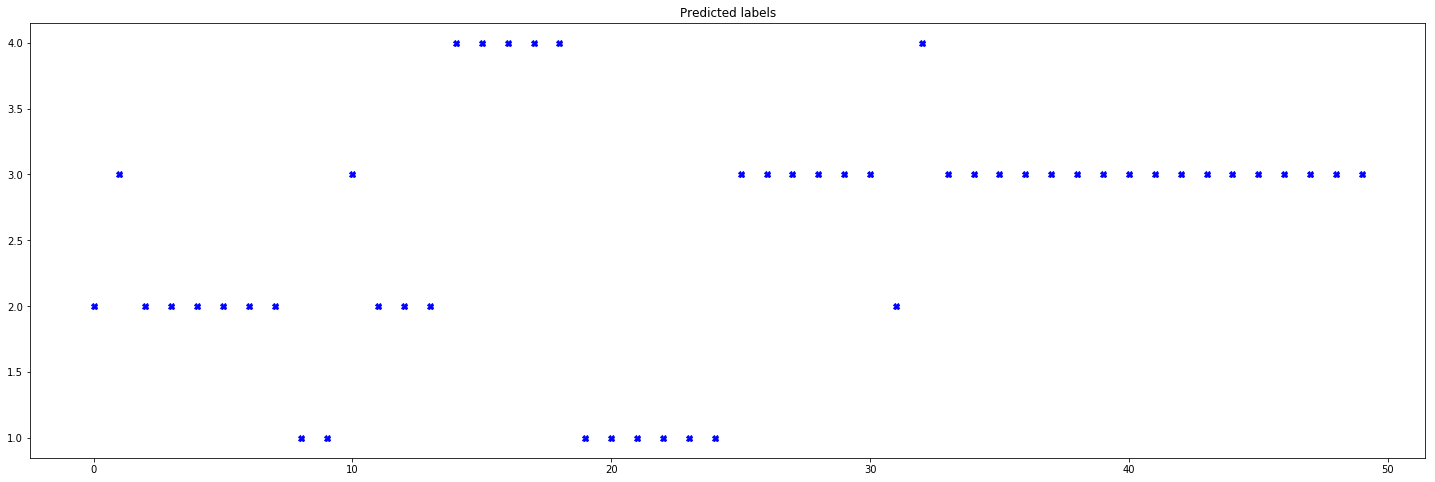

In [117]:
plt.figure(figsize=(25,8))
plt.plot(range(50),labels_st,'X',color = 'blue')
plt.title('Predicted labels')

Some points look inconsistent with the time interval series, so smoothing is a good option for improving accuracy

I run the smoothing function on the data

In [111]:
test_label_p_smoothed = smooth_labels(pd.Series(labels_st),2)

In [112]:
self_test_df_labeled['labels_stsm'] = test_label_p_smoothed 

I run the accuracy function on the smoothed data

In [113]:
differential_accuracy(self_test_df_labeled,'label','labels_stsm',[1,2,3,4])

overall accuracy: 0.92
label 1 : 1.0
label 2 : 0.9285714285714286
label 3 : 0.9230769230769231
label 4 : 0.8333333333333334


Text(0.5, 1.0, 'Predicted smoothed labels')

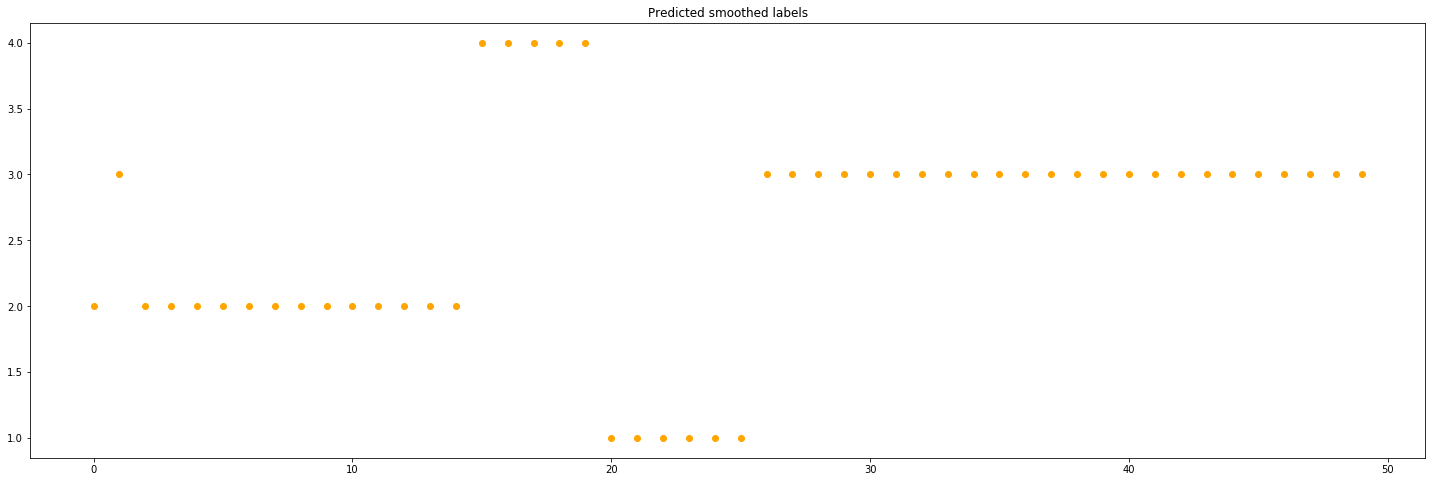

In [118]:
plt.figure(figsize=(25,8))
plt.plot(range(50),test_label_p_smoothed,'o',color = 'orange')
plt.title('Predicted smoothed labels')

Smoothing has improved accuracy and consistency accross time intervals looks much better

# Test Dataframe
I generate the test dataframe importing the csv file

In [20]:
df_test_ts = pd.read_csv('test_time_series.csv')
df_test_ts.head()

,Unnamed: 0,timestamp,UTC time,accuracy,x,y,z
0,24330,1565110306139,2019-08-06T16:51:46.139,unknown,0.034286,-1.504456,0.157623
1,24331,1565110306239,2019-08-06T16:51:46.239,unknown,0.409164,-1.038544,0.030975
2,24332,1565110306340,2019-08-06T16:51:46.340,unknown,-0.234390,-0.984558,0.124771
3,24333,1565110306440,2019-08-06T16:51:46.440,unknown,0.251114,-0.787003,0.054810
4,24334,1565110306540,2019-08-06T16:51:46.540,unknown,0.109924,-0.169510,0.235550


In [21]:
df_test_l = pd.read_csv('test_labels.csv')
df_test_l.head()

,Unnamed: 0,timestamp,UTC time,label
0,24339,1565110307041,2019-08-06T16:51:47.041,NaN
1,24349,1565110308043,2019-08-06T16:51:48.043,NaN
2,24359,1565110309046,2019-08-06T16:51:49.046,NaN
3,24369,1565110310048,2019-08-06T16:51:50.048,NaN
4,24379,1565110311050,2019-08-06T16:51:51.050,NaN


In [22]:
df_test= pd.merge(df_test_ts,df_test_l, on=['timestamp'], how = 'left')
df_test.head()

,Unnamed: 0_x,timestamp,UTC time_x,accuracy,x,y,z,Unnamed: 0_y,UTC time_y,label
0,24330,1565110306139,2019-08-06T16:51:46.139,unknown,0.034286,-1.504456,0.157623,NaN,NaN,NaN
1,24331,1565110306239,2019-08-06T16:51:46.239,unknown,0.409164,-1.038544,0.030975,NaN,NaN,NaN
2,24332,1565110306340,2019-08-06T16:51:46.340,unknown,-0.234390,-0.984558,0.124771,NaN,NaN,NaN
3,24333,1565110306440,2019-08-06T16:51:46.440,unknown,0.251114,-0.787003,0.054810,NaN,NaN,NaN
4,24334,1565110306540,2019-08-06T16:51:46.540,unknown,0.109924,-0.169510,0.235550,NaN,NaN,NaN


In [23]:
df_test = df_test[['timestamp','UTC time_x','x','y','z']]
df_test.head()

,timestamp,UTC time_x,x,y,z
0,1565110306139,2019-08-06T16:51:46.139,0.034286,-1.504456,0.157623
1,1565110306239,2019-08-06T16:51:46.239,0.409164,-1.038544,0.030975
2,1565110306340,2019-08-06T16:51:46.340,-0.234390,-0.984558,0.124771
3,1565110306440,2019-08-06T16:51:46.440,0.251114,-0.787003,0.054810
4,1565110306540,2019-08-06T16:51:46.540,0.109924,-0.169510,0.235550


# Results

I run the prediction function

In [24]:
label_predicted_list= mov_prediction(df_test,movelet_dict_xyz,10,['x','y','z'])

Text(0.5, 1.0, 'Predicted labels')

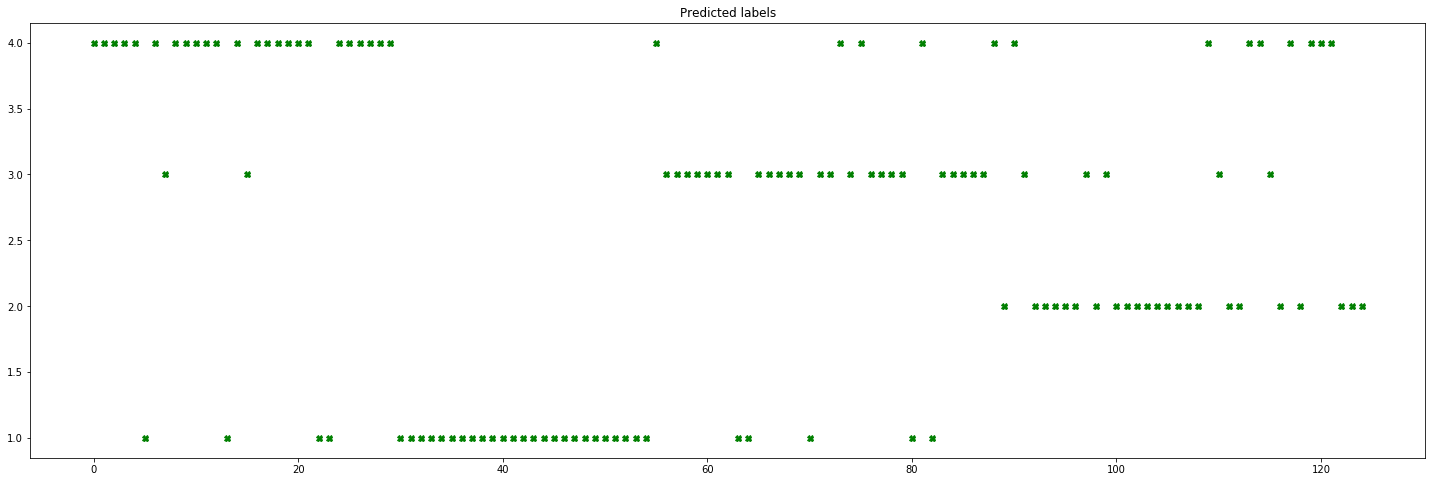

In [115]:
plt.figure(figsize=(25,8))
plt.plot(range(125),label_predicted_list,'X',color = 'green')
plt.title('Predicted labels')

Apparently the prediction shows a certain trend in the type of movement for different time intervals. The need to run the smoothing algorithm to improve the prediction adjustment seems obvious.

I Run the smoothing function

In [26]:
label_p_smoothed = smooth_labels(pd.Series(label_predicted_list),2)

Text(0.5, 1.0, 'Smoothed Predicted Labels')

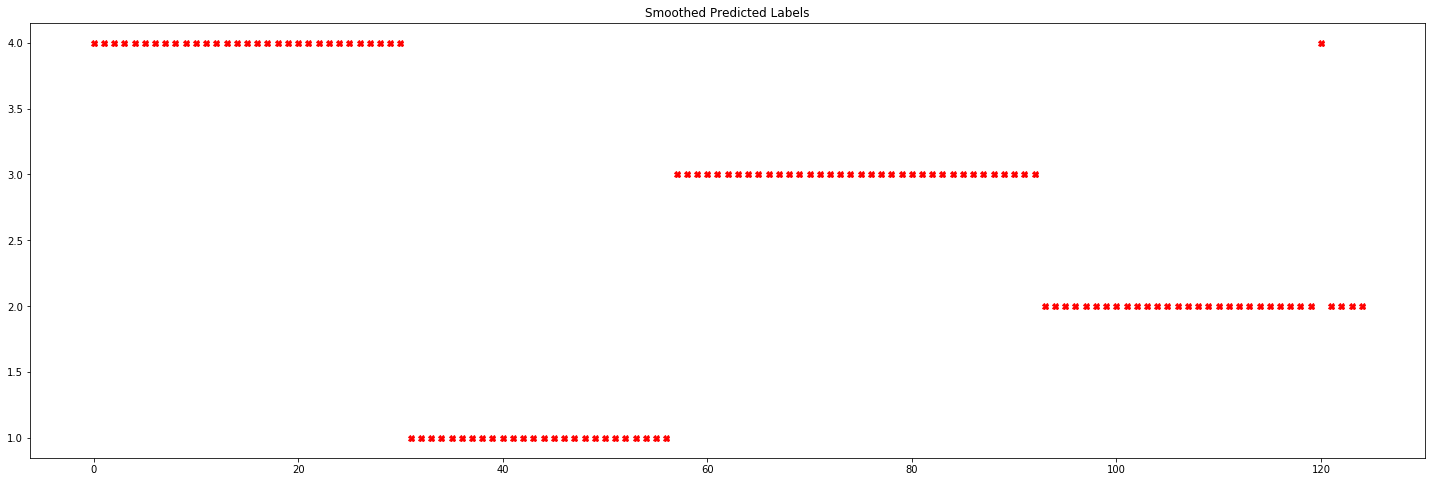

In [116]:
plt.figure(figsize=(25,8))
plt.plot(range(125),label_p_smoothed,'X',color = 'red')

plt.title('Smoothed Predicted Labels')

After running the smoothing function the results of the prediction look more homogeneous during the time intervals. This will clearly improve the prediction.

In [28]:
df_prediction = df_test_l
df_prediction['label'] = label_p_smoothed 

In [29]:
df_prediction = df_prediction[['timestamp','label']]

In [30]:
df_prediction.head()

,timestamp,label
0,1565110307041,4
1,1565110308043,4
2,1565110309046,4
3,1565110310048,4
4,1565110311050,4


I export the dataframe into a csv file

In [31]:
df_prediction.to_csv('df_prediction.csv')

I will run the whole prediction code and time the duration of the process

In [32]:
start_time = time.time()
df_test_ts = pd.read_csv('test_time_series.csv')
df_test_l = pd.read_csv('test_labels.csv')
df_test= pd.merge(df_test_ts,df_test_l, on=['timestamp'], how = 'left')
df_test = df_test[['timestamp','UTC time_x','x','y','z']]
label_predicted_list= mov_prediction(df_test,movelet_dict_xyz,10,['x','y','z'])
label_p_smoothed = smooth_labels(pd.Series(label_predicted_list),2)
df_prediction = df_test_l
df_prediction['label'] = label_p_smoothed 
df_prediction = df_prediction[['timestamp','label']]
print ("My program took", time.time() - start_time, "to run")

My program took 33.86230206489563 to run


# Conclusion
A computational strategy was designed for the prediction of the type of movement based on a set of three-axis accelerometers labeled. It is based on a bibliographic research done prior to coding. The strategy consists on a movelet dictionary generation and a data smoothing algorithm (refere to bibliography quoted in the introduction). As in any data analysis exercise, it is very important to understand the origin and the nature of the data.
Timeseries analysis and accelerometer data is not my area of expertice (I am a Biochemist), so much reading was needed in a begining to understand the way to approach to this kind of data.
The prediction result is acceptable (close to 80%). It is likely that a better prediction is possible by improving the characteristics of the movelet dictionary, for example by choosing movelets that best represent the labeled movement.